-Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [1303]:
data1=pd.read_csv('ToyotaCorolla.csv',encoding='latin')   

In [1304]:
data1.drop(columns='Id',inplace=True)
data1

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [1305]:
data=data1.drop(columns=['Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color', 'Color', 'Automatic',
                          'Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis=1)

In [1306]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## EDA

### Renaming Column Name

In [1307]:
data=data.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT'})

In [1308]:
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Missing Values

In [1309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


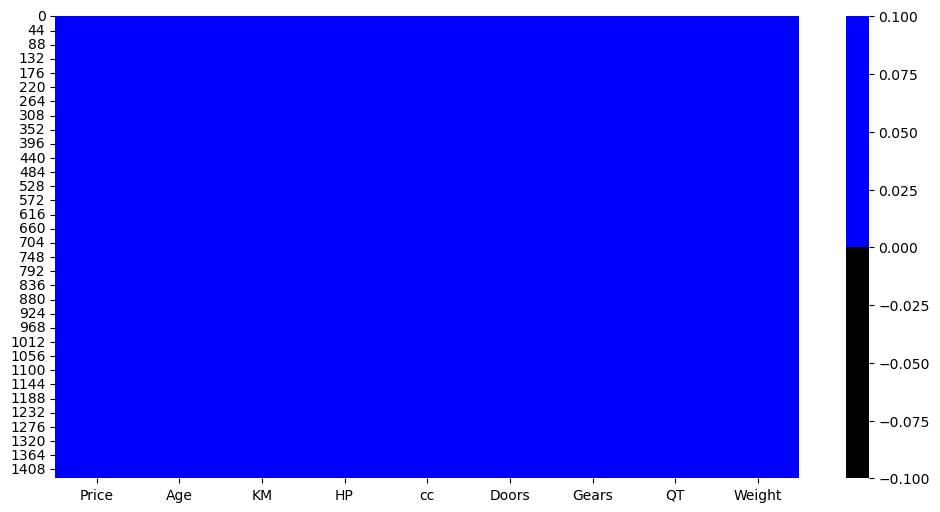

In [1310]:
# Plot the heatmap to find more about Missing values

plt.figure(figsize=(12,6))
cols=data.columns
colors=['black','blue']

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colors))
plt.show();

- Inference-Their are No Null values And datatypes are also given accuratly.

In [1311]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


-  Inference-It seems that their are some outliers in above Features,lets check by boxplot

### Outlier detection

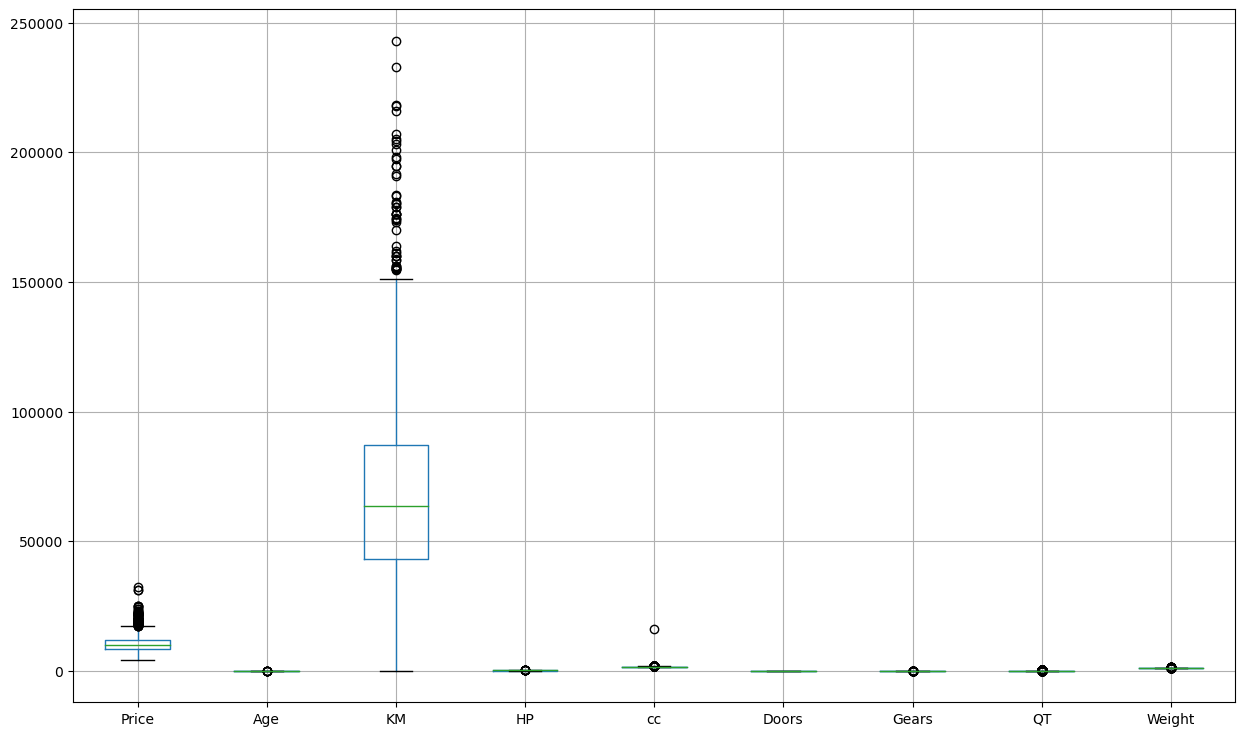

In [1312]:
data.boxplot(figsize=(15,9));
plt.show()

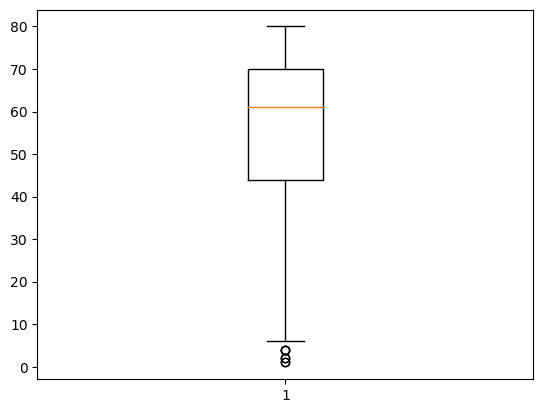

In [1313]:
box1=plt.boxplot(data['Age'])
plt.show();

- Inference=data is Right skewed,outliers are present below lower whisker and mean is around 60

In [1314]:
# Lets extract Outlier values
[x.get_ydata() for x in box1['fliers']]

[array([4, 4, 4, 2, 2, 1, 1], dtype=int64)]

In [1315]:
#deleting Outliers
data=data[data['Age'] != 4]
data=data[data['Age'] != 2]
data=data[data['Age'] != 1]

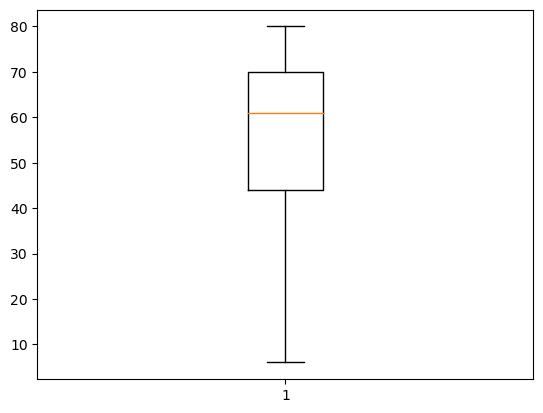

In [1316]:
plt.boxplot(data['Age'])
plt.show();

- Age feature distribution is left skewed,we treat in skew section later

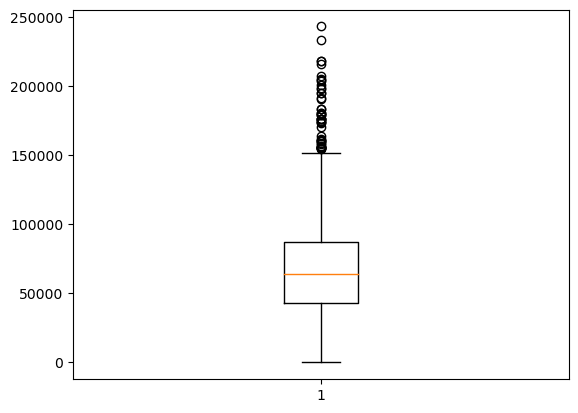

In [1317]:
plt.boxplot(data['KM'])
plt.show();

In [1318]:
data.KM.mean()      #mean of above feature

68864.95311406578

In [1319]:
Q11=data['KM'].quantile(0.25)
Q33=data['KM'].quantile(0.75)
IQR1=Q33-Q11
print(Q11)
print(Q33)
print(IQR1)
Lower_Whisker1 = Q11-1.5*IQR1
Upper_Whisker1 = Q33+1.5*IQR1
print(Lower_Whisker1, Upper_Whisker1)

43120.0
87274.0
44154.0
-23111.0 153505.0


In [1320]:
# extracting outliers above upper whisker
data=data[data['KM']<200000]

In [1321]:
data.KM.mean()

67836.39605355884

- Distribution is Right skewed

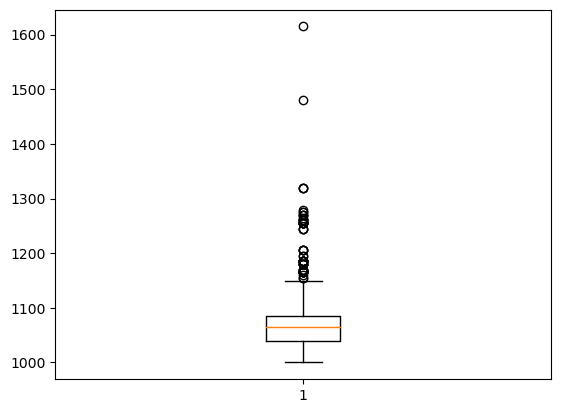

In [1322]:
box6=plt.boxplot(data['Weight'])
plt.show();

In [1323]:
data.Weight.mean()

1071.1458773784354

In [1324]:
[x.get_ydata() for x in box6['fliers']]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1320, 1320, 1270, 1280, 1270, 1255, 1275,
        1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205, 1170, 1615,
        1165, 1205, 1165, 1260, 1260, 1155, 1480], dtype=int64)]

In [1325]:
# extracting outliers
data=data[data['Weight'] != 1205]
data=data[data['Weight'] != 1480]
data=data[data['Weight'] != 1245]
data=data[data['Weight'] != 1255]
data=data[data['Weight'] != 1615]
data=data[data['Weight'] != 1260]
data=data[data['Weight'] != 1270]
data=data[data['Weight'] != 1275]
data=data[data['Weight'] != 1265]
data=data[data['Weight'] != 1320]
data=data[data['Weight'] != 1280]

In [1326]:
data.Weight.mean()

1066.5389048991356

In [1327]:
data.shape

(1388, 9)

### checking skew value and train model with skewed data

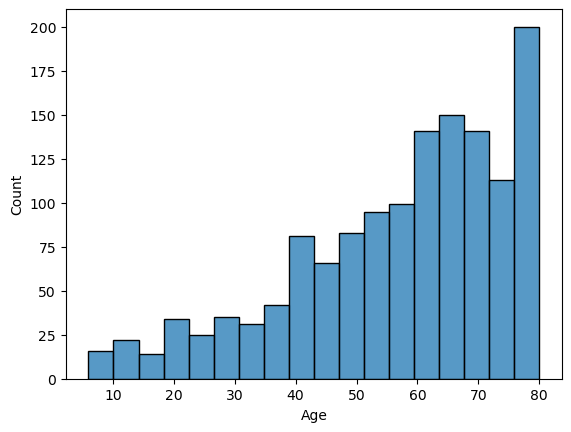

In [1328]:
sns.histplot(data.Age)
plt.show();

In [1329]:
data.Age.skew()

-0.8197850879765732

- data is left skewed

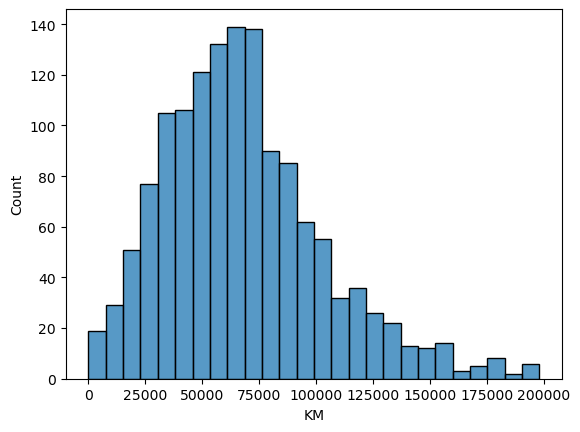

In [1330]:
sns.histplot(data.KM);
plt.show()

In [1331]:
data.KM.skew()

0.8168032965829629

- Data is right skewed

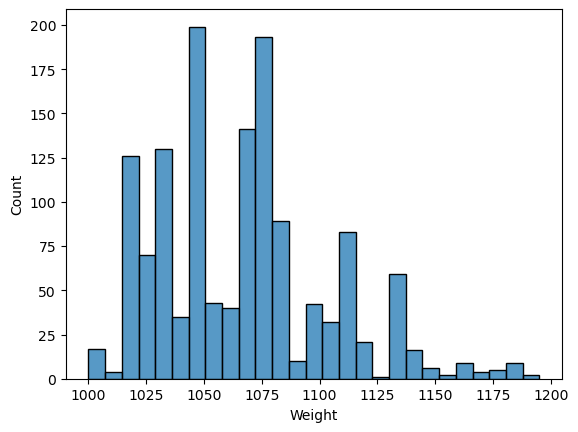

In [1332]:
sns.histplot(data.Weight);
plt.show()

In [1333]:
data.Weight.skew()

0.7019625338902695

In [1334]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [1335]:
# Do Data Transformation,because of that model doesn't get biased.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data)

In [1336]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [1337]:
data1     #in array formate

array([[ 0.91835872, -1.90389119, -0.59771122, ..., -0.14288138,
         3.63355904,  2.66103443],
       [ 0.99554096, -1.90389119,  0.13941541, ..., -0.14288138,
         3.63355904,  2.66103443],
       [ 1.05728675, -1.84756016, -0.74754525, ..., -0.14288138,
         3.63355904,  2.66103443],
       ...,
       [-0.62528599,  0.79999793, -1.44899576, ..., -0.14288138,
        -0.42266303, -1.39290346],
       [-1.01119716,  0.74366691, -1.45183621, ..., -0.14288138,
        -0.42266303, -1.39290346],
       [-1.10381584,  1.08165305, -1.93229928, ..., -0.14288138,
        -1.86103966,  1.28269554]])

In [1338]:
# converting array into dataframe formate

data_cleaned=pd.DataFrame(data1,columns=['Price','Age','KM','HP','cc','Doors','Gears','QT','Weight'])

In [1339]:
data_cleaned

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0.918359,-1.903891,-0.597711,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
1,0.995541,-1.903891,0.139415,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
2,1.057287,-1.847560,-0.747545,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
3,1.366016,-1.734898,-0.568909,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
4,0.995541,-1.509574,-0.838752,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.796166
...,...,...,...,...,...,...,...,...,...
1383,-0.934015,0.687336,-1.348784,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.122641
1384,0.098683,0.856329,-1.392641,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1385,-0.625286,0.799998,-1.448996,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1386,-1.011197,0.743667,-1.451836,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903


In [1340]:
# drop duplicates rows

data_cleaned=data_cleaned.drop_duplicates()

In [1341]:
data_cleaned.shape

(1388, 9)

In [1342]:
# before fitting model,lets check correlation between features
data_cleaned.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.874539,-0.588986,0.344498,0.088784,0.166613,0.080935,0.033836,0.525657
Age,-0.874539,1.000000,0.515172,-0.165506,-0.066469,-0.131273,-0.012567,-0.083436,-0.448097
KM,-0.588986,0.515172,1.000000,-0.306026,0.095343,-0.030442,0.018327,0.335659,0.002917
HP,0.344498,-0.165506,-0.306026,1.000000,0.055330,0.089458,0.211402,-0.323997,0.165952
cc,0.088784,-0.066469,0.095343,0.055330,1.000000,0.072654,0.018871,0.272741,0.356085
Doors,0.166613,-0.131273,-0.030442,0.089458,0.072654,1.000000,-0.161314,0.083731,0.374183
Gears,0.080935,-0.012567,0.018327,0.211402,0.018871,-0.161314,1.000000,0.007538,0.052692
QT,0.033836,-0.083436,0.335659,-0.323997,0.272741,0.083731,0.007538,1.000000,0.546002
Weight,0.525657,-0.448097,0.002917,0.165952,0.356085,0.374183,0.052692,0.546002,1.000000


- Inferences-Their are no correlation between feature and feature.

& maximum correlation between target(Price) and feature (Age,KM,Weight)

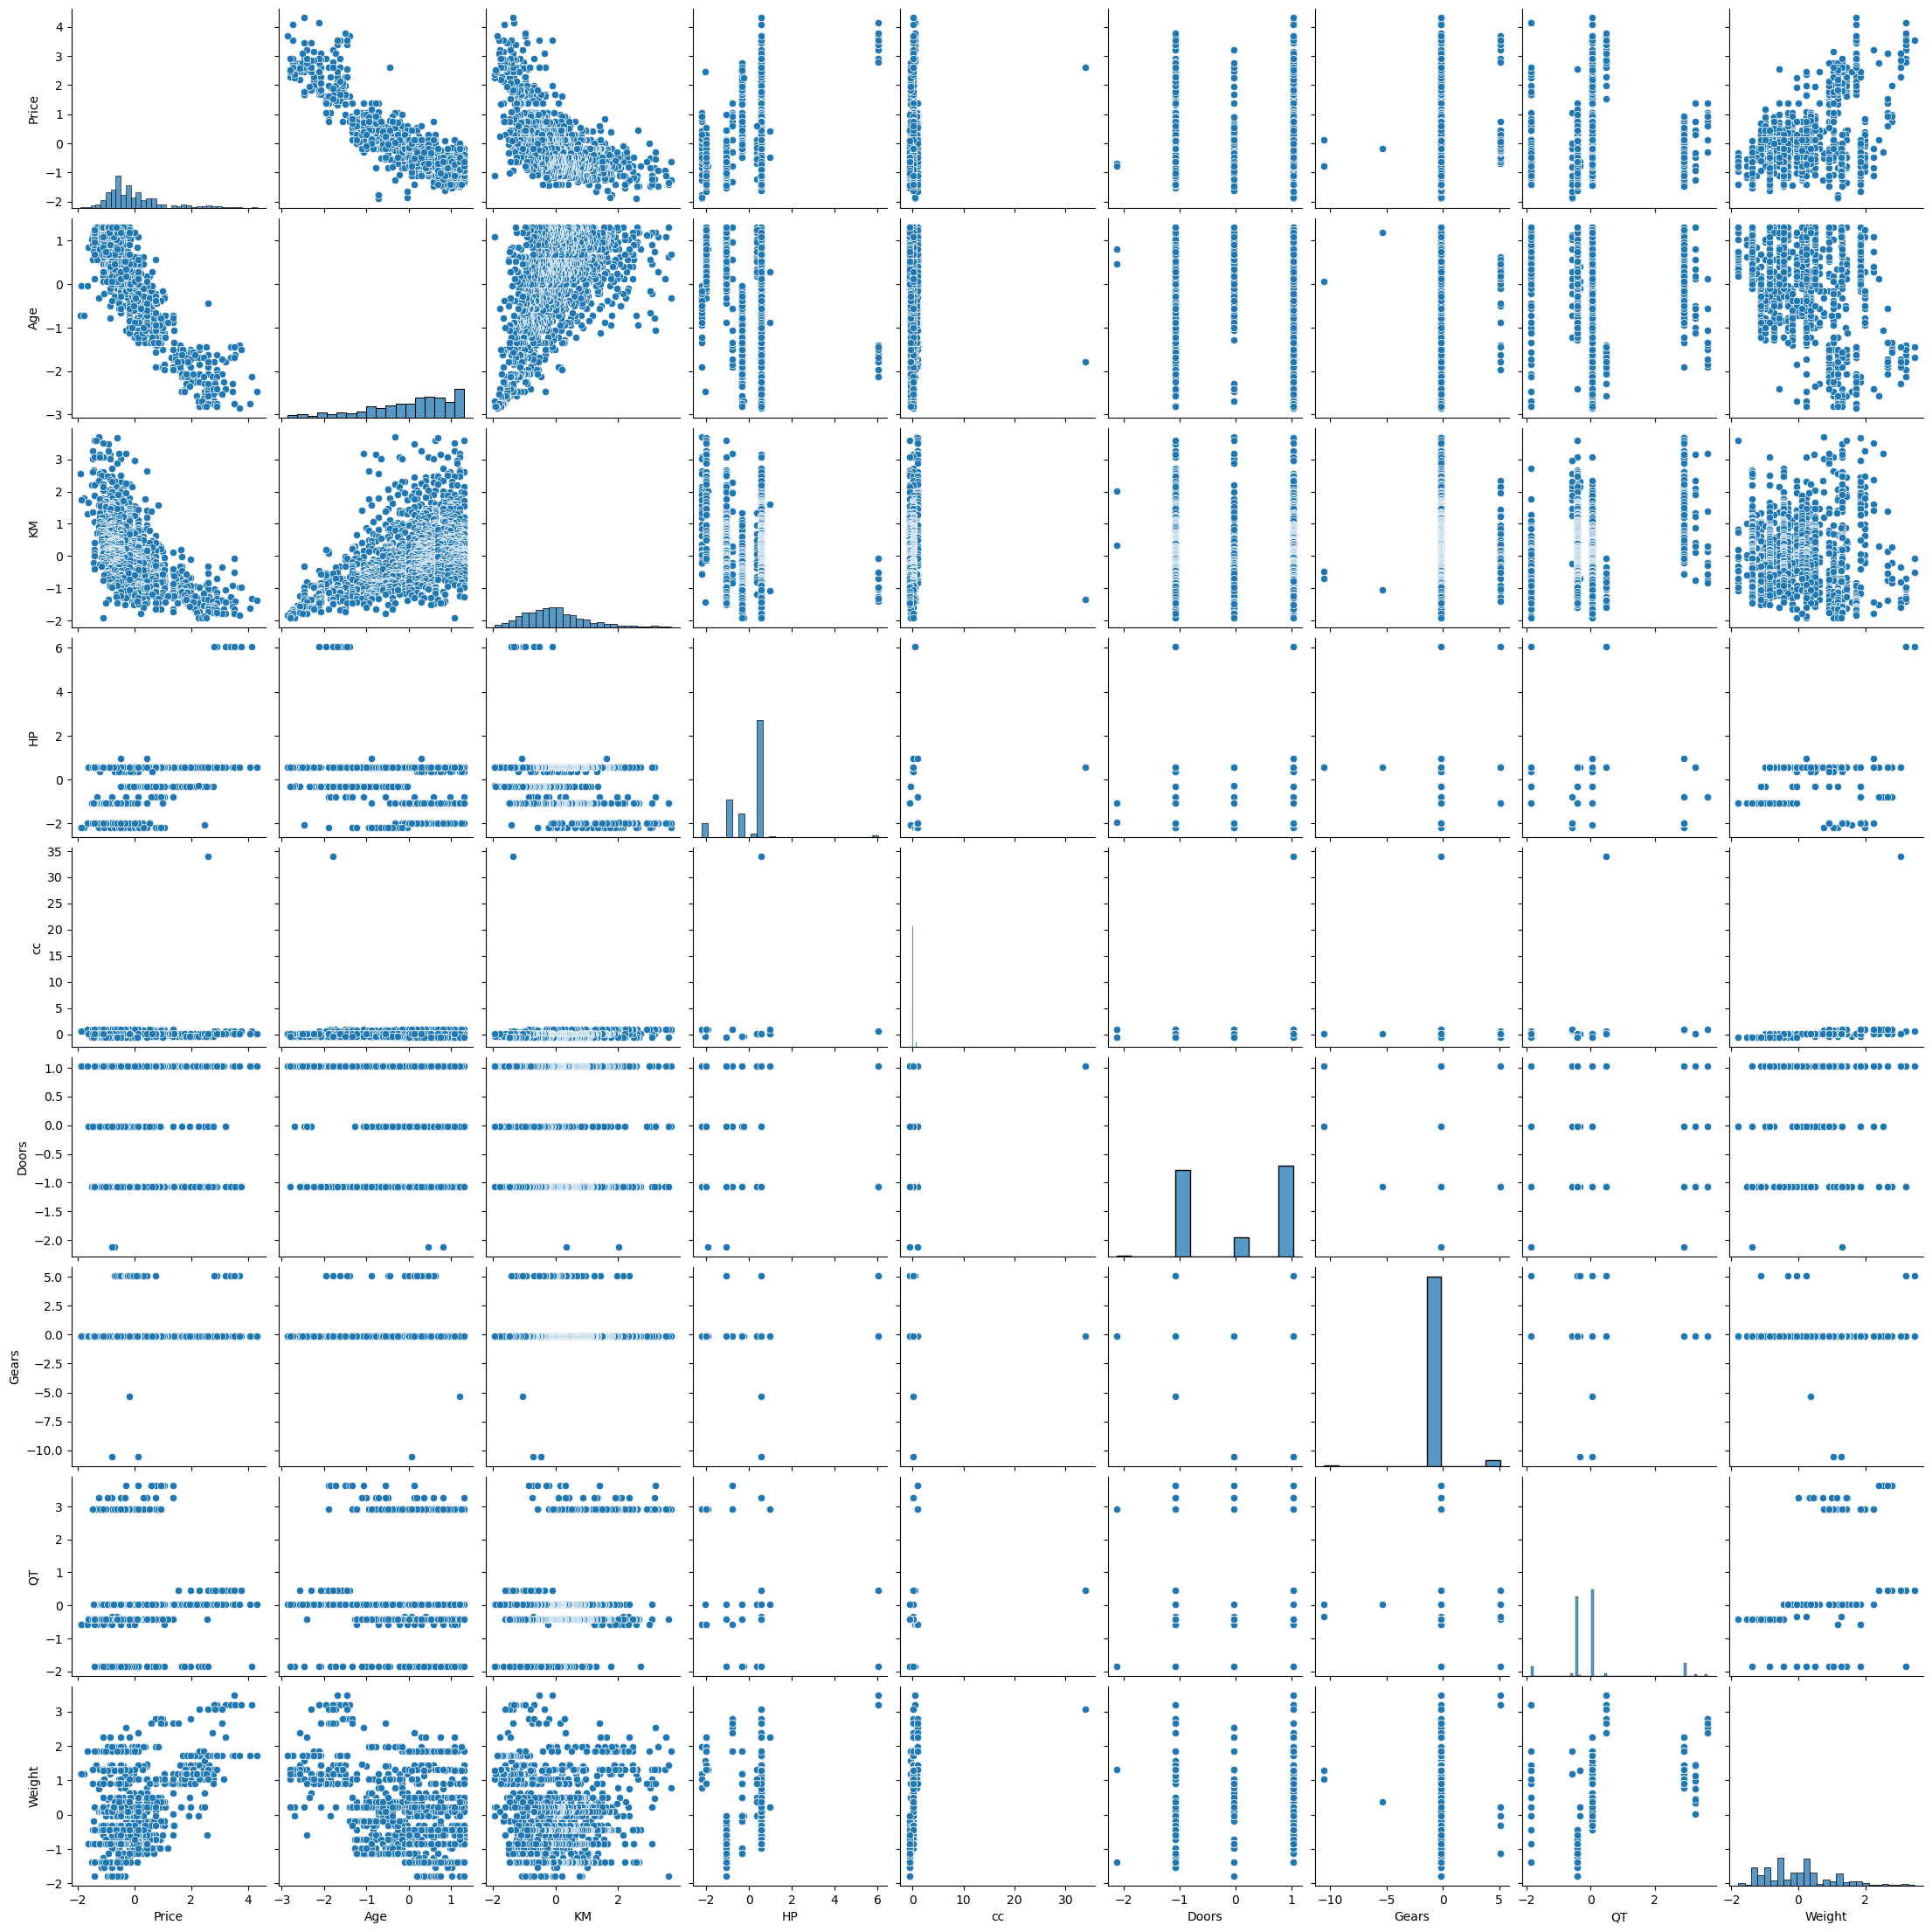

In [1343]:
# lets check correlation by Visualization
sns.pairplot(data_cleaned)
plt.show();

- Inference= from above visualization weight and Price has positive correlation.

price and Age has negative correlation.

price and KM has negative correlation

## Model building

In [1344]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data_cleaned).fit()

In [1345]:
# Finding Coefficient parameters
model.params

Intercept   -2.411266e-16
Age         -6.388966e-01
KM          -2.099084e-01
HP           1.103013e-01
cc          -1.838006e-02
Doors       -1.946256e-02
Gears        3.729494e-02
QT          -4.904925e-02
Weight       2.603198e-01
dtype: float64

In [1346]:
#t and p-Values
model.tvalues, np.round(model.pvalues,5)

(Intercept   -2.340980e-14
 Age         -4.478121e+01
 KM          -1.534722e+01
 HP           8.741031e+00
 cc          -1.645482e+00
 Doors       -1.685473e+00
 Gears        3.446292e+00
 QT          -3.239543e+00
 Weight       1.526179e+01
 dtype: float64,
 Intercept    1.00000
 Age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.10010
 Doors        0.09212
 Gears        0.00059
 QT           0.00123
 Weight       0.00000
 dtype: float64)

- From above p value of Doors and cc feature are greater than 0.05

In [1347]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8536950969034364, 0.8528463374946094)

- Accuracy without treating skewness is 85.36%

In [ ]:
# Lets check p-value with single feature

In [1348]:
model_d=smf.ols('Price~Doors',data=data_cleaned).fit()
print(model_d.tvalues, '\n', model_d.pvalues)  

Intercept   -9.104161e-15
Doors        6.290780e+00
dtype: float64 
 Intercept    1.000000e+00
Doors        4.226273e-10
dtype: float64


In [1349]:
# Doors has significant pvalue

In [1350]:
model_cc=smf.ols('Price~cc',data=data_cleaned).fit()
model_cc.tvalues, np.round(model_cc.pvalues,5)

(Intercept   -9.012497e-15
 cc           3.318457e+00
 dtype: float64,
 Intercept    1.00000
 cc           0.00093
 dtype: float64)

In [1351]:
# cc doent has significant pvalue

In [1352]:
model_cd=smf.ols('Price~cc+Doors',data=data_cleaned).fit()
model_cd.tvalues, np.round(model_cd.pvalues,5)

(Intercept   -9.128668e-15
 cc           2.910640e+00
 Doors        6.079573e+00
 dtype: float64,
 Intercept    1.00000
 cc           0.00366
 Doors        0.00000
 dtype: float64)

## Lets do distribution in Normal Format

In [1353]:
data.KM.skew()

0.8168032965829629

In [1354]:
data.KM=np.sqrt(data.KM)

In [1355]:
data.KM.skew()

-0.10039573745317944

In [1356]:
data.Weight.skew()

0.7019625338902695

In [1357]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,216.762543,90,2000,3,5,210,1165
1,13750,23,270.068510,90,2000,3,5,210,1165
2,13950,24,204.232710,90,2000,3,5,210,1165
3,14950,26,219.089023,90,2000,3,5,210,1165
4,13750,30,196.214169,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,143.331783,86,1300,3,5,69,1025
1432,10845,72,137.840488,86,1300,3,5,69,1015
1433,8500,71,130.445391,86,1300,3,5,69,1015
1434,7250,70,130.061524,86,1300,3,5,69,1015


In [1358]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data)

In [1359]:
data_cleaned_final=pd.DataFrame(data1,columns=['Price','Age','KM','HP','cc','Doors','Gears','QT','Weight'])

In [1360]:
data_cleaned_final

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0.918359,-1.903891,-0.499514,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
1,0.995541,-1.903891,0.268697,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
2,1.057287,-1.847560,-0.680086,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
3,1.366016,-1.734898,-0.465986,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
4,0.995541,-1.509574,-0.795644,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.796166
...,...,...,...,...,...,...,...,...,...
1383,-0.934015,0.687336,-1.557752,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.122641
1384,0.098683,0.856329,-1.636889,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1385,-0.625286,0.799998,-1.743462,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1386,-1.011197,0.743667,-1.748994,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903


In [1393]:
data_cleaned.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.874539,-0.588986,0.344498,0.088784,0.166613,0.080935,0.033836,0.525657
Age,-0.874539,1.000000,0.515172,-0.165506,-0.066469,-0.131273,-0.012567,-0.083436,-0.448097
KM,-0.588986,0.515172,1.000000,-0.306026,0.095343,-0.030442,0.018327,0.335659,0.002917
HP,0.344498,-0.165506,-0.306026,1.000000,0.055330,0.089458,0.211402,-0.323997,0.165952
cc,0.088784,-0.066469,0.095343,0.055330,1.000000,0.072654,0.018871,0.272741,0.356085
Doors,0.166613,-0.131273,-0.030442,0.089458,0.072654,1.000000,-0.161314,0.083731,0.374183
Gears,0.080935,-0.012567,0.018327,0.211402,0.018871,-0.161314,1.000000,0.007538,0.052692
QT,0.033836,-0.083436,0.335659,-0.323997,0.272741,0.083731,0.007538,1.000000,0.546002
Weight,0.525657,-0.448097,0.002917,0.165952,0.356085,0.374183,0.052692,0.546002,1.000000


In [1362]:
import statsmodels.formula.api as smf 
model_final = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data_cleaned_final).fit()

In [1363]:
#R squared values
(model_final.rsquared,model_final.rsquared_adj)

(0.8551244442114112, 0.8542839768826884)

-After treating skew accuracy increase from 85.36% to 85.51%

In [1364]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=data_cleaned_final).fit().rsquared
vif_age = 1/(1-rsq_age) # 16.33

rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=data_cleaned_final).fit().rsquared  
vif_km = 1/(1-rsq_km) # 564.98

rsq_hp = smf.ols('HP~KM+Age+cc+Doors+Gears+QT+Weight',data=data_cleaned_final).fit().rsquared  
vif_hp = 1/(1-rsq_hp) #  564.84

rsq_cc = smf.ols('cc~KM+HP+Age+Doors+Gears+QT+Weight',data=data_cleaned_final).fit().rsquared  
vif_cc = 1/(1-rsq_cc) #  16.35

rsq_d = smf.ols('Doors~KM+HP+cc+Age+Gears+QT+Weight',data=data_cleaned_final).fit().rsquared  
vif_d = 1/(1-rsq_d) #  16.35

rsq_g = smf.ols('Gears~KM+HP+cc+Doors+Age+QT+Weight',data=data_cleaned_final).fit().rsquared  
vif_g = 1/(1-rsq_g) #  16.35

rsq_qt = smf.ols('QT~KM+HP+cc+Doors+Gears+Age+Weight',data=data_cleaned_final).fit().rsquared  
vif_qt = 1/(1-rsq_qt) #  16.35

rsq_wt = smf.ols('Weight~KM+HP+cc+Doors+Gears+QT+Age',data=data_cleaned_final).fit().rsquared  
vif_wt = 1/(1-rsq_wt) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,2.059973
1,KM,1.869654
2,HP,1.477055
3,cc,1.175858
4,Doors,1.256623
5,Gears,1.103961
6,QT,2.177008
7,Weight,2.716463


- None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

## Residual Analysis
- Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

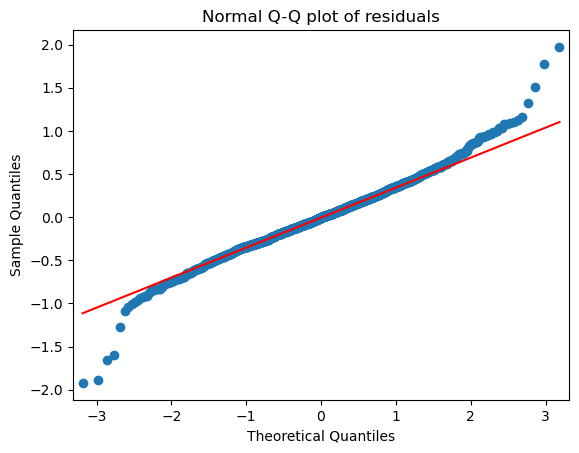

In [1365]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [1366]:
list(np.where(model.resid< -1.5))  # outliar detection from above QQ plot of residuals

[array([159, 160, 356, 365], dtype=int64)]

In [1367]:
 # Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

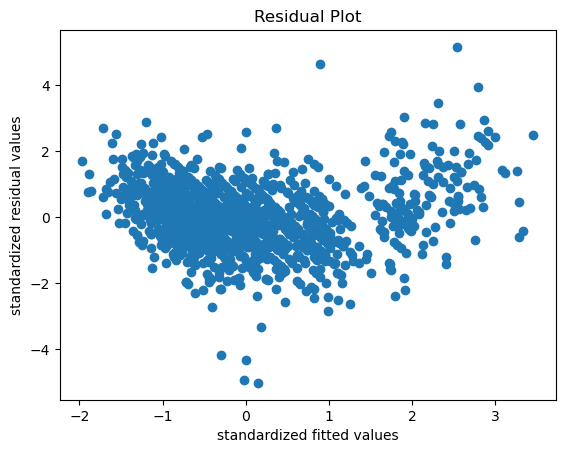

In [1368]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [1161]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


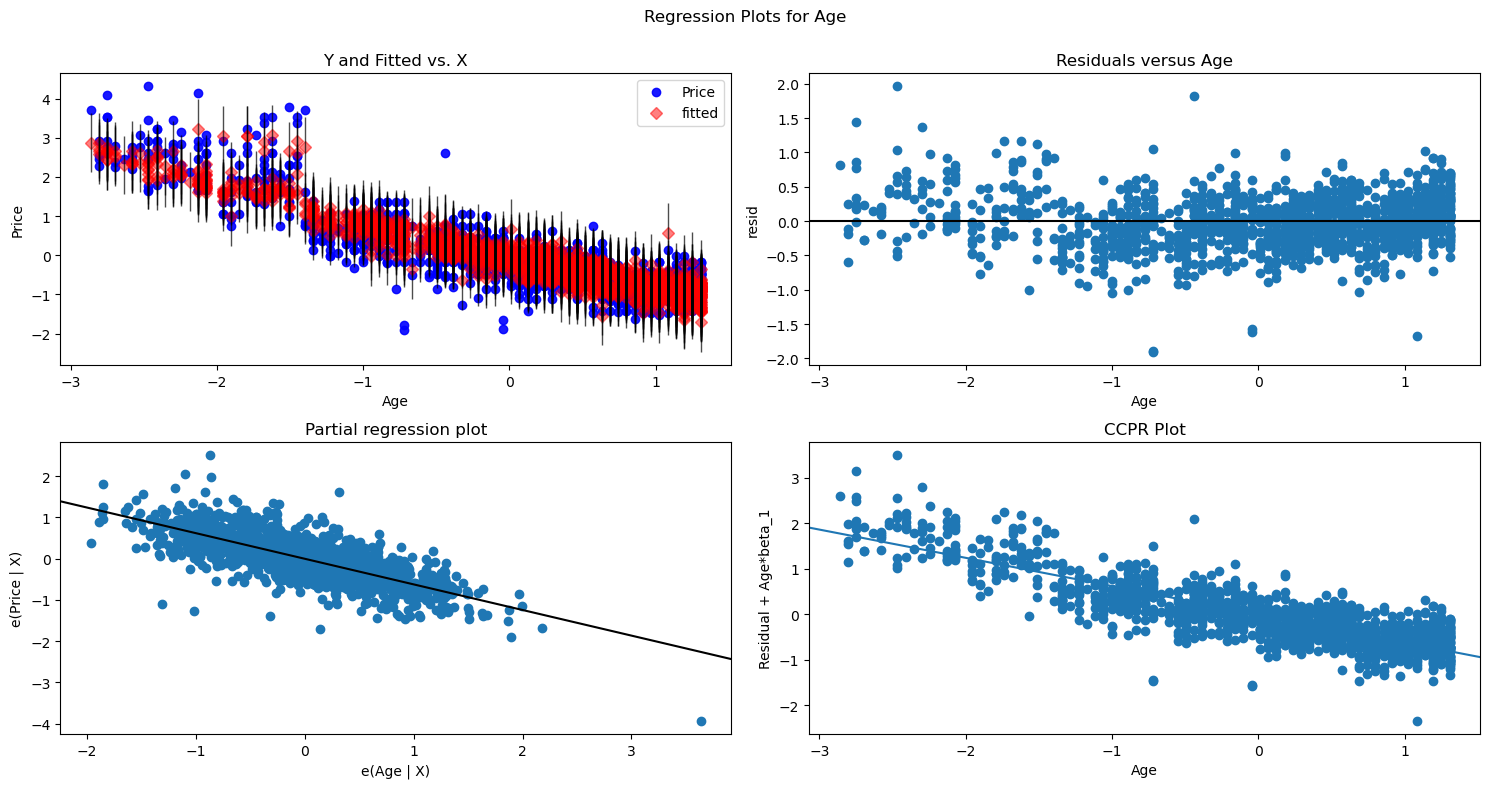

In [1369]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'Age',fig=fig)
plt.show()

eval_env: 1


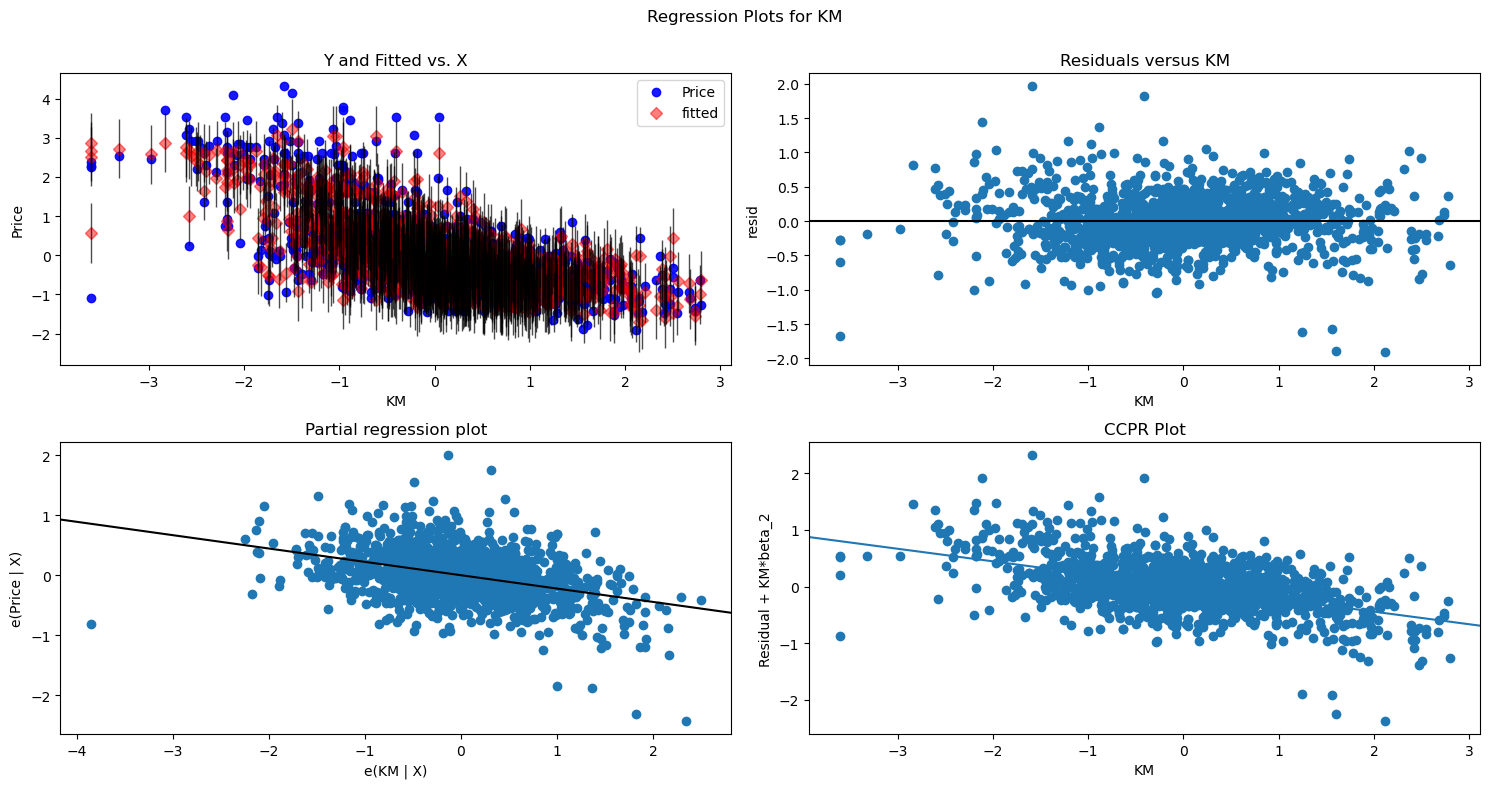

In [1370]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'KM',fig=fig)
plt.show()

eval_env: 1


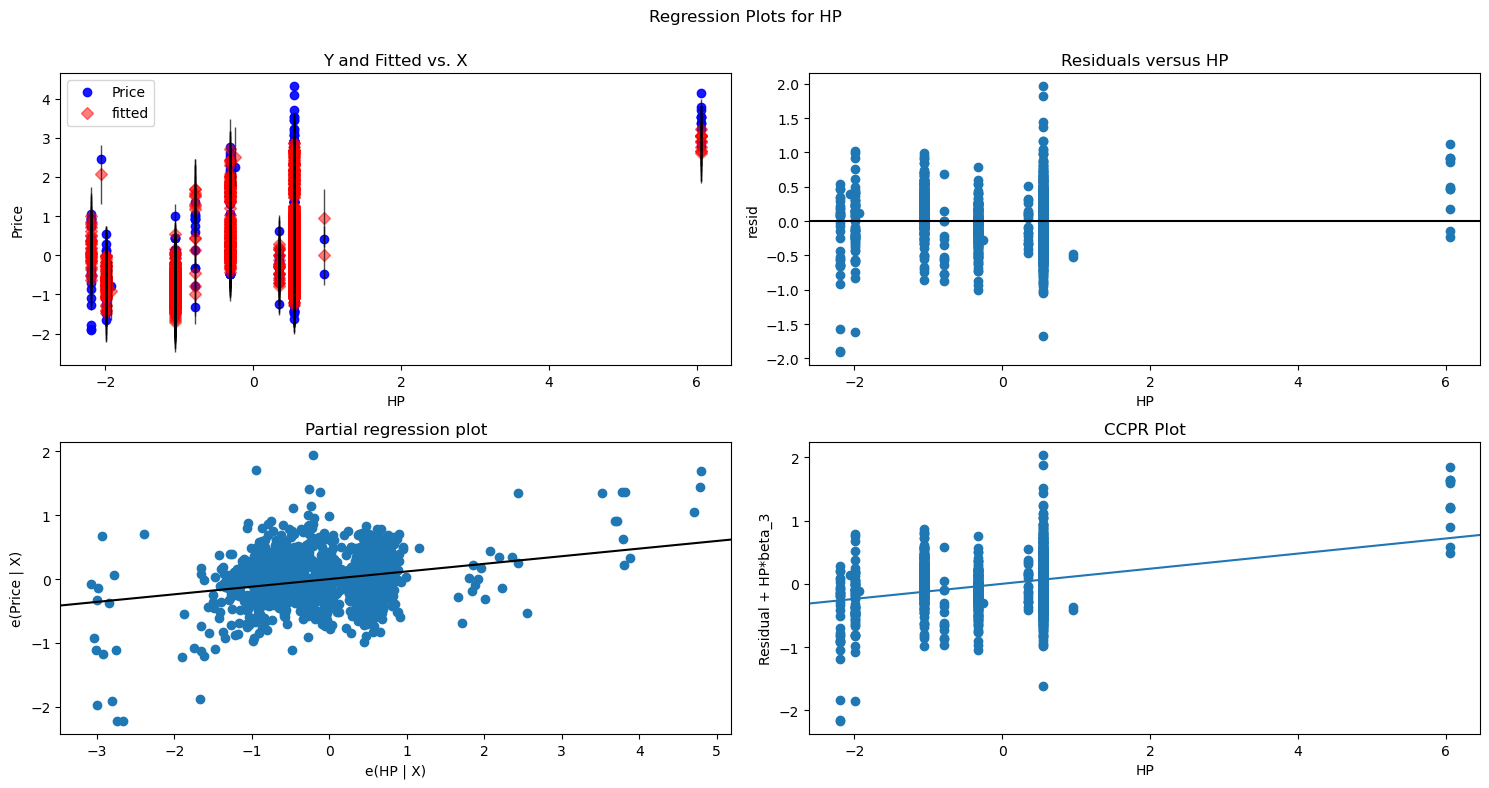

In [1371]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'HP',fig=fig)
plt.show()

eval_env: 1


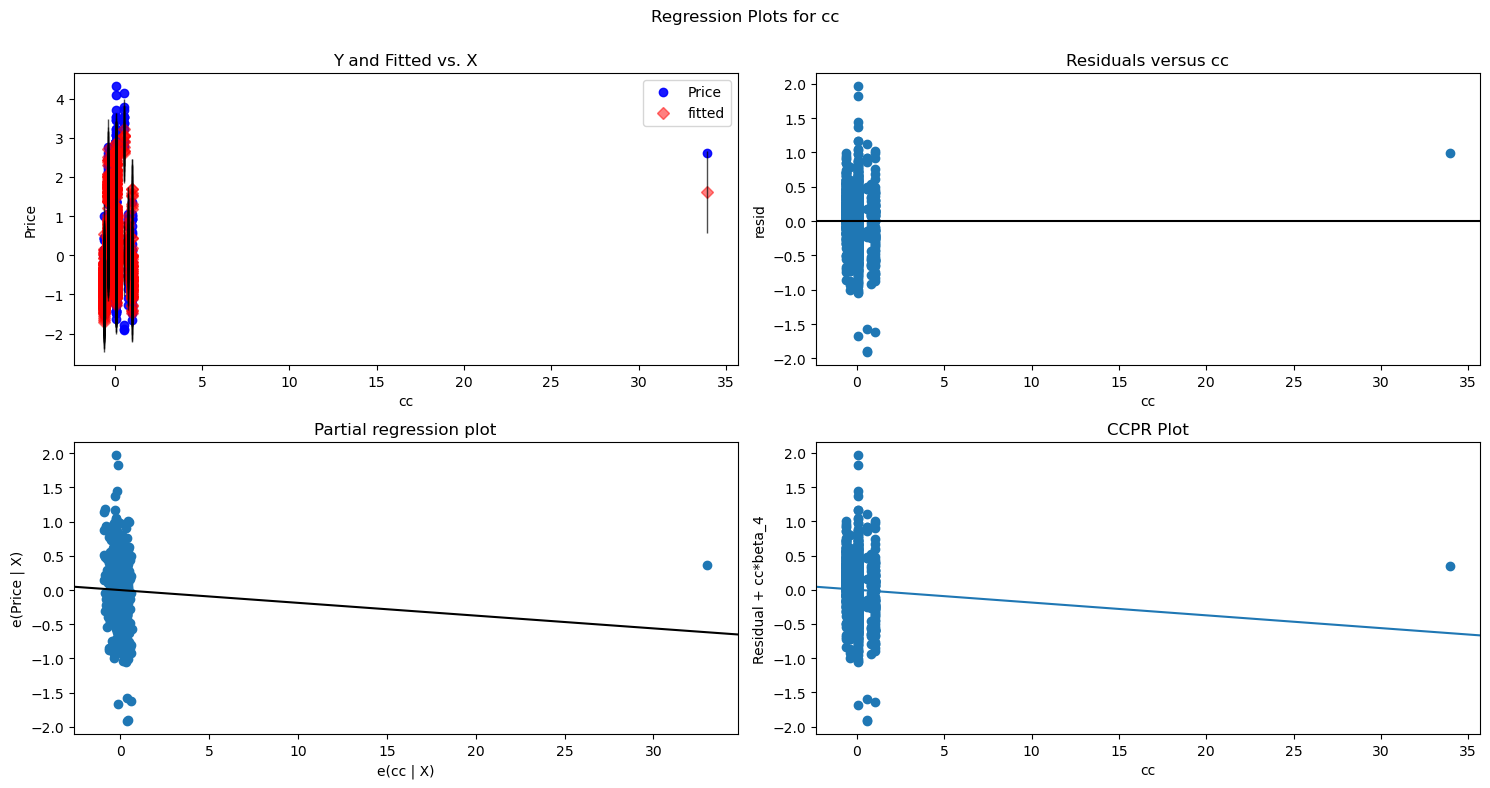

In [1372]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'cc',fig=fig)
plt.show()

eval_env: 1


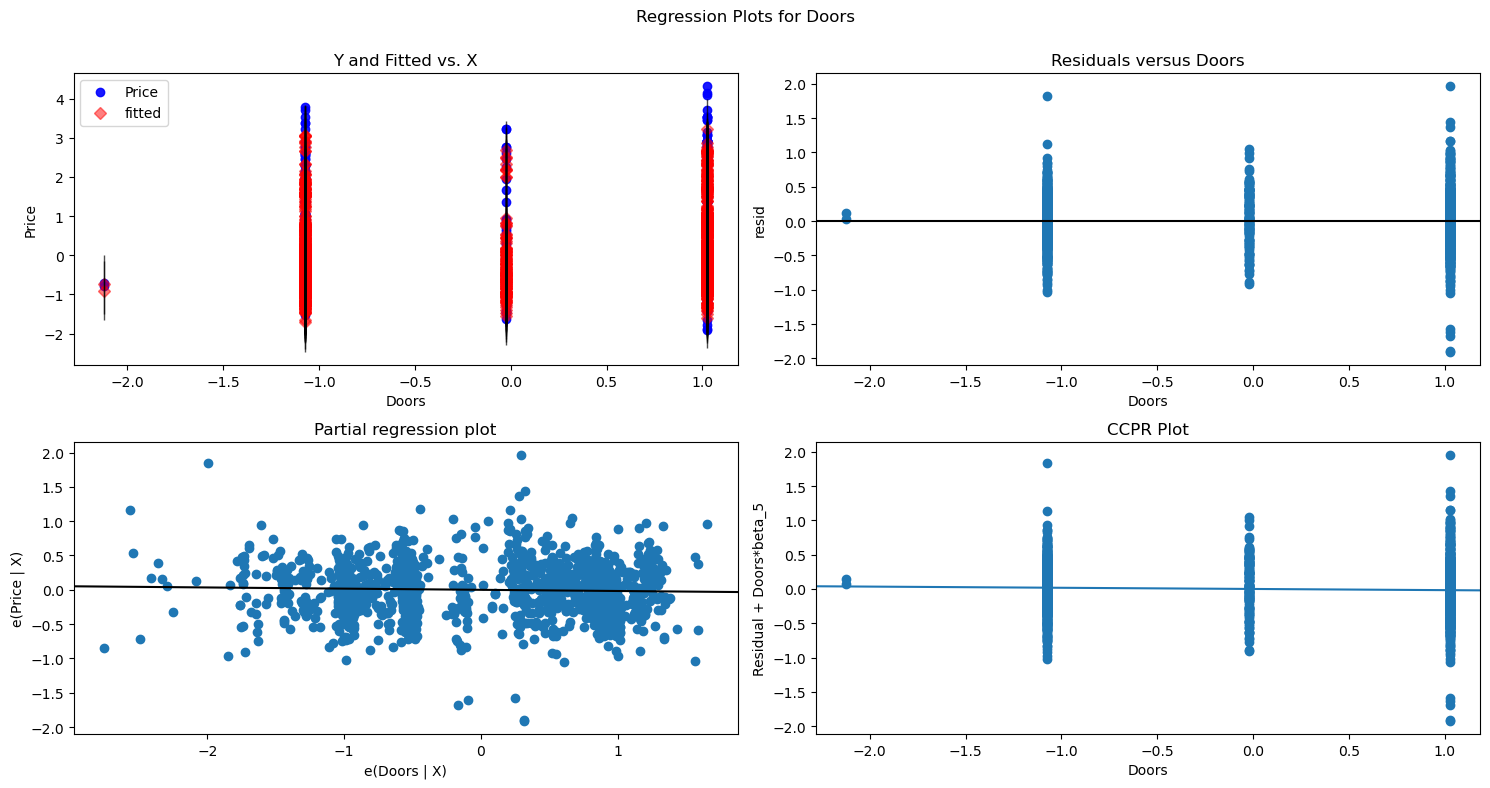

In [1373]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'Doors',fig=fig)
plt.show()

eval_env: 1


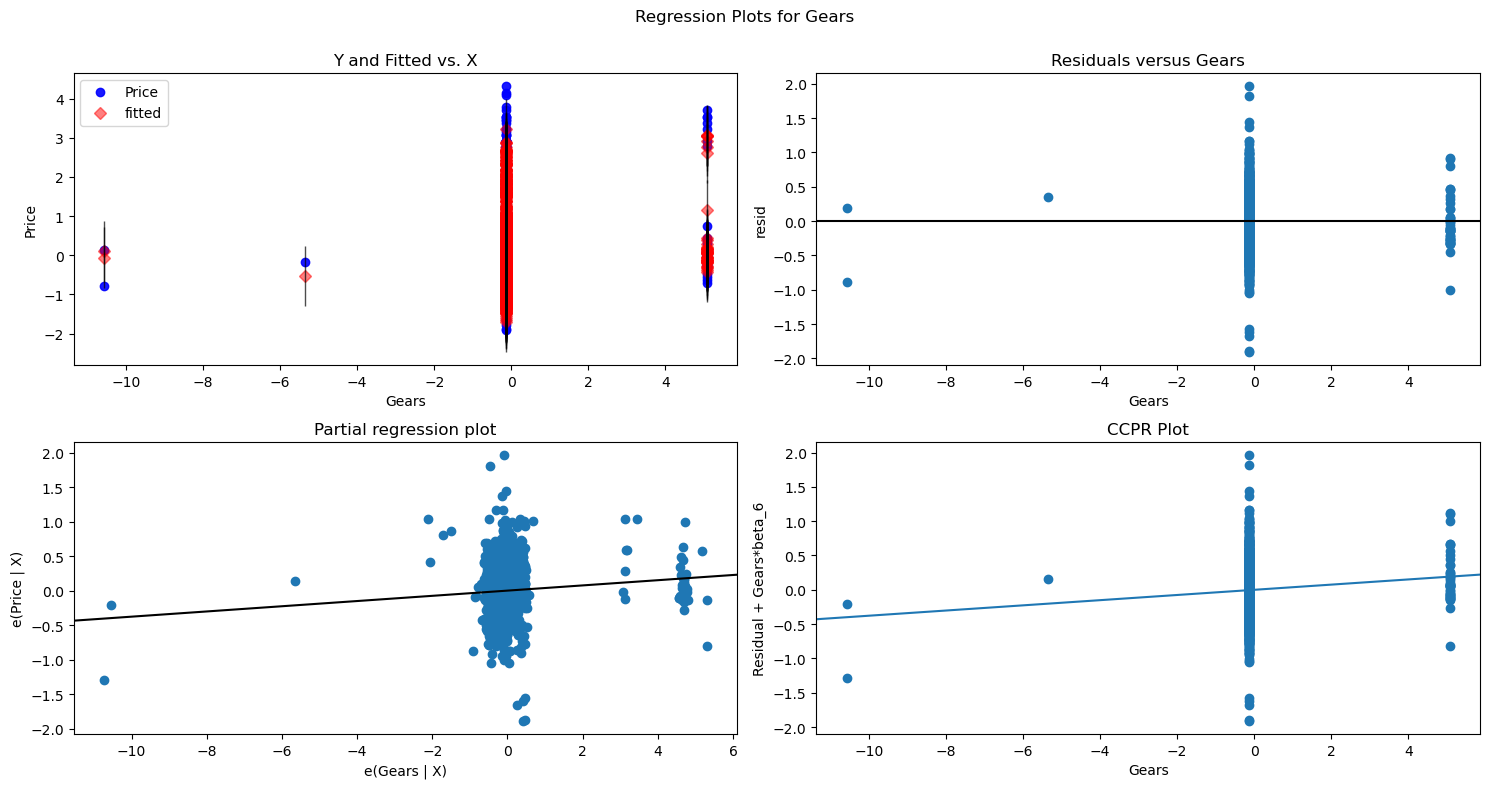

In [1374]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'Gears',fig=fig)
plt.show()

eval_env: 1


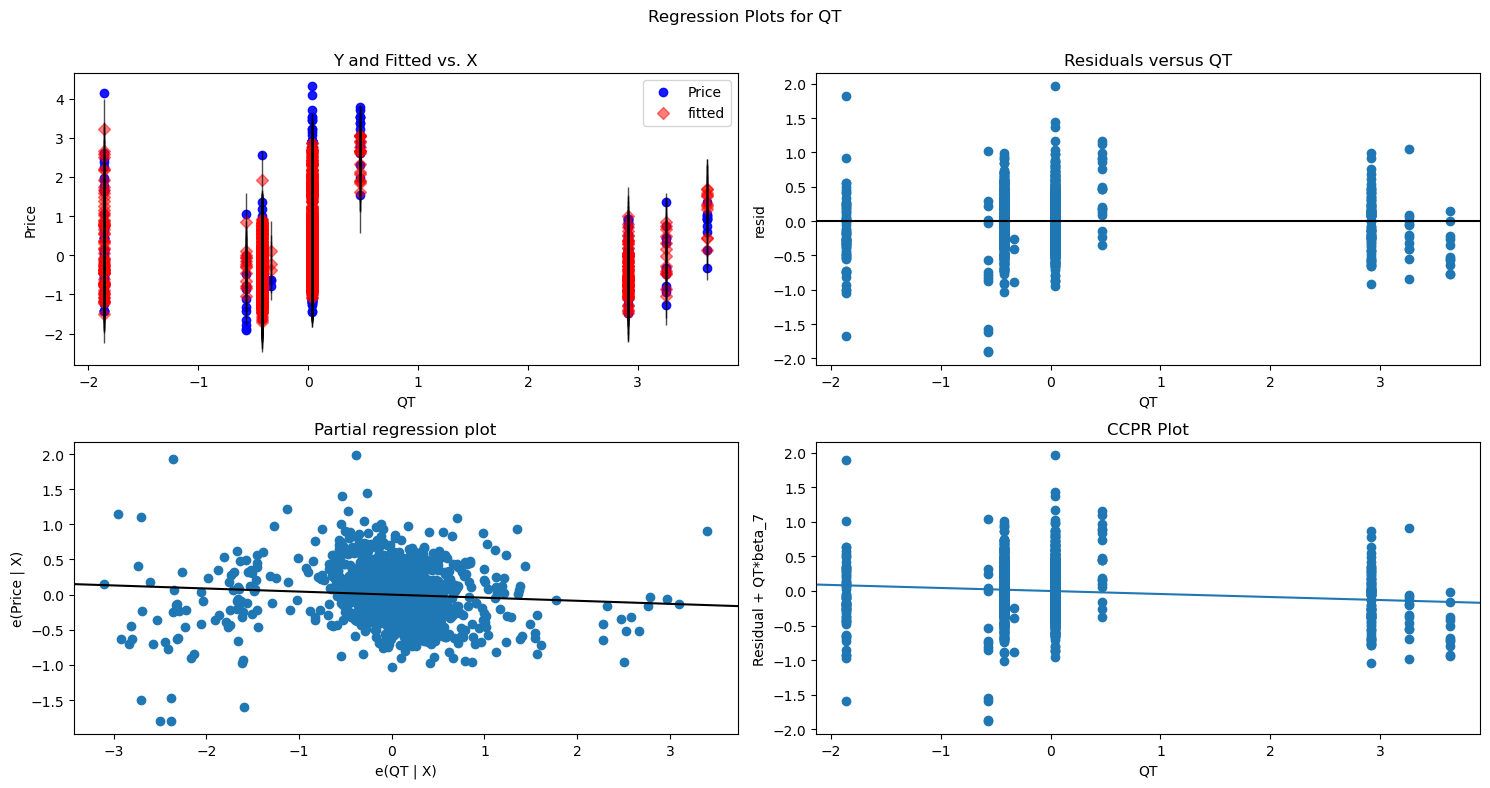

In [1375]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'QT',fig=fig)
plt.show()

eval_env: 1


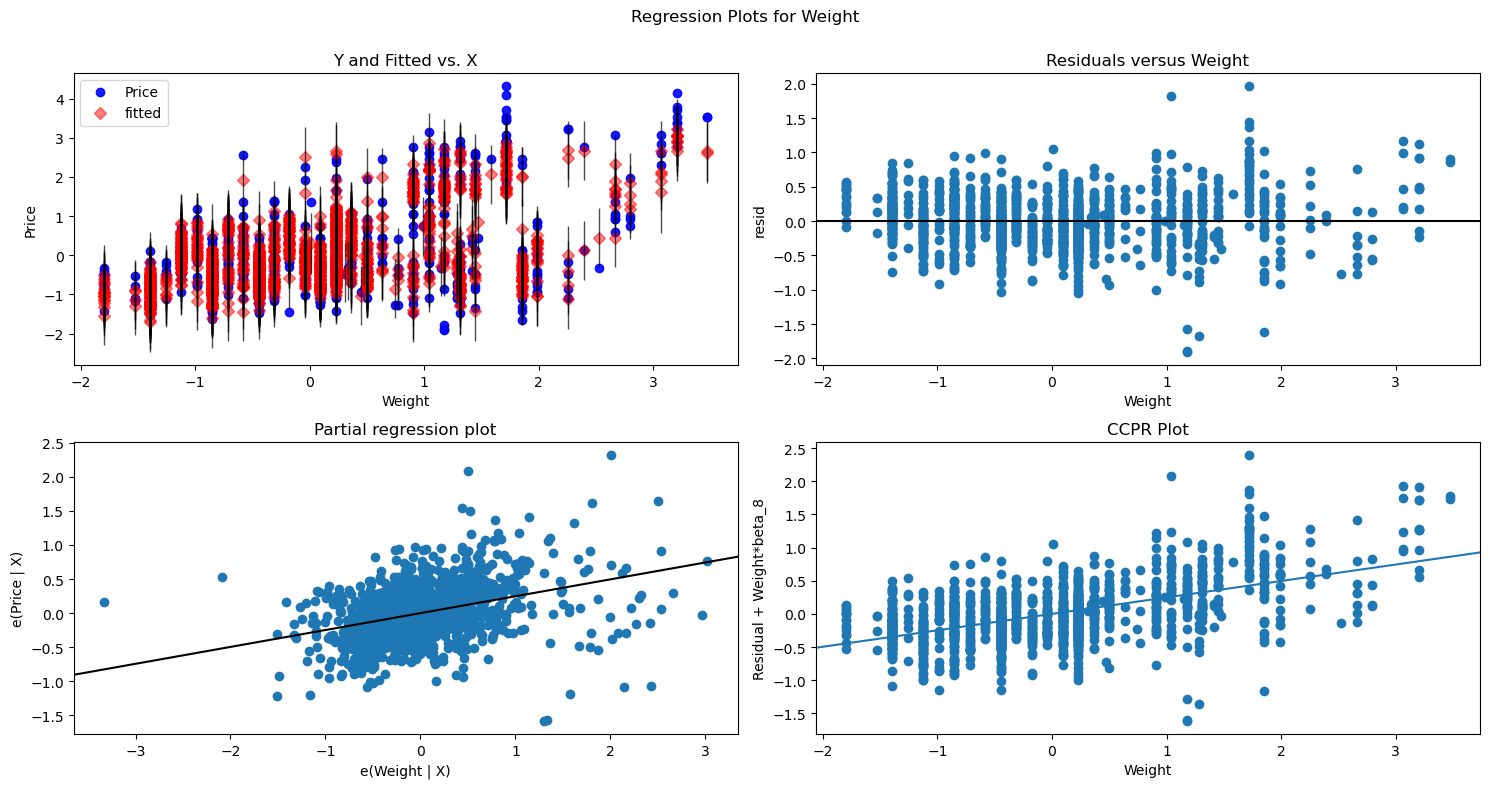

In [1376]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_final,'Weight',fig=fig)
plt.show()


## Model Deletion Diagnostics (checking Outliers or Influencers)

In [1377]:
# Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model_final.get_influence().cooks_distance
c

array([7.08068213e-03, 3.19540726e-03, 4.94370414e-03, ...,
       5.30443287e-05, 1.76883695e-03, 7.99501545e-02])

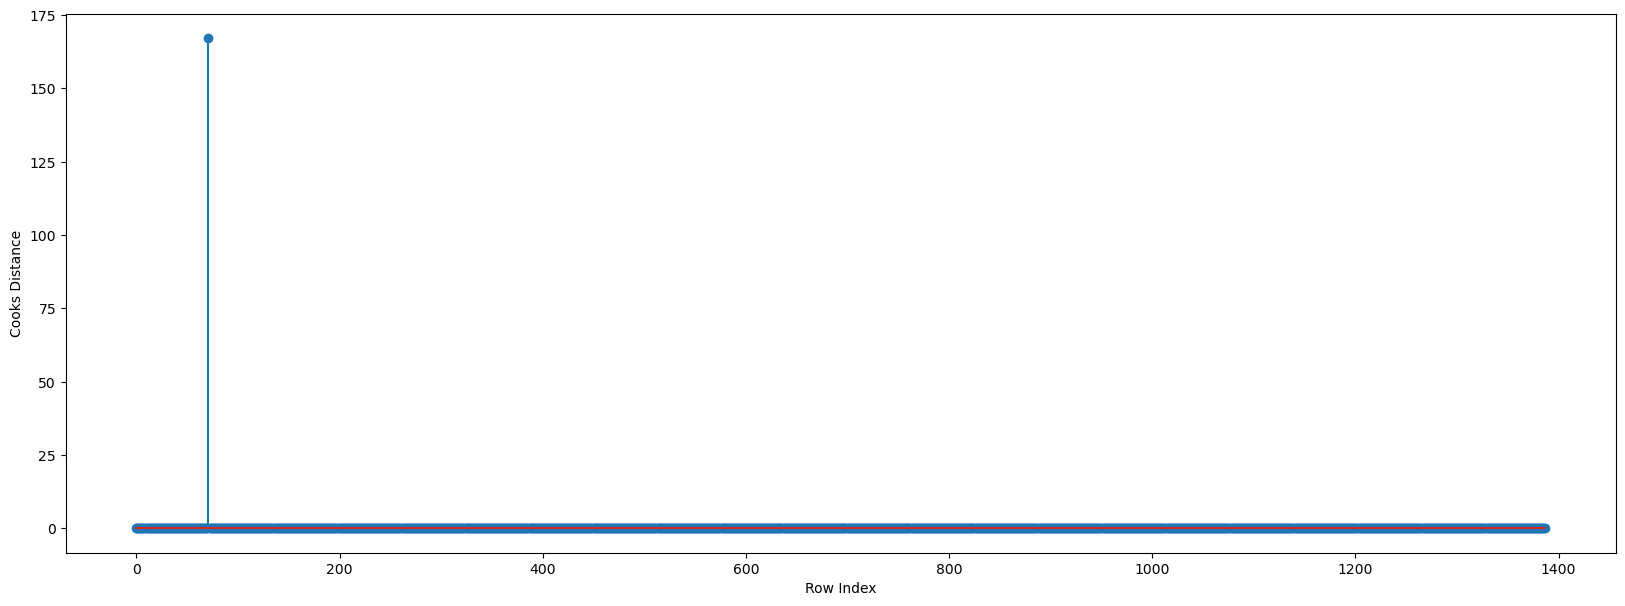

In [1378]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data_cleaned_final)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [1379]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(71, 167.1030178637056)

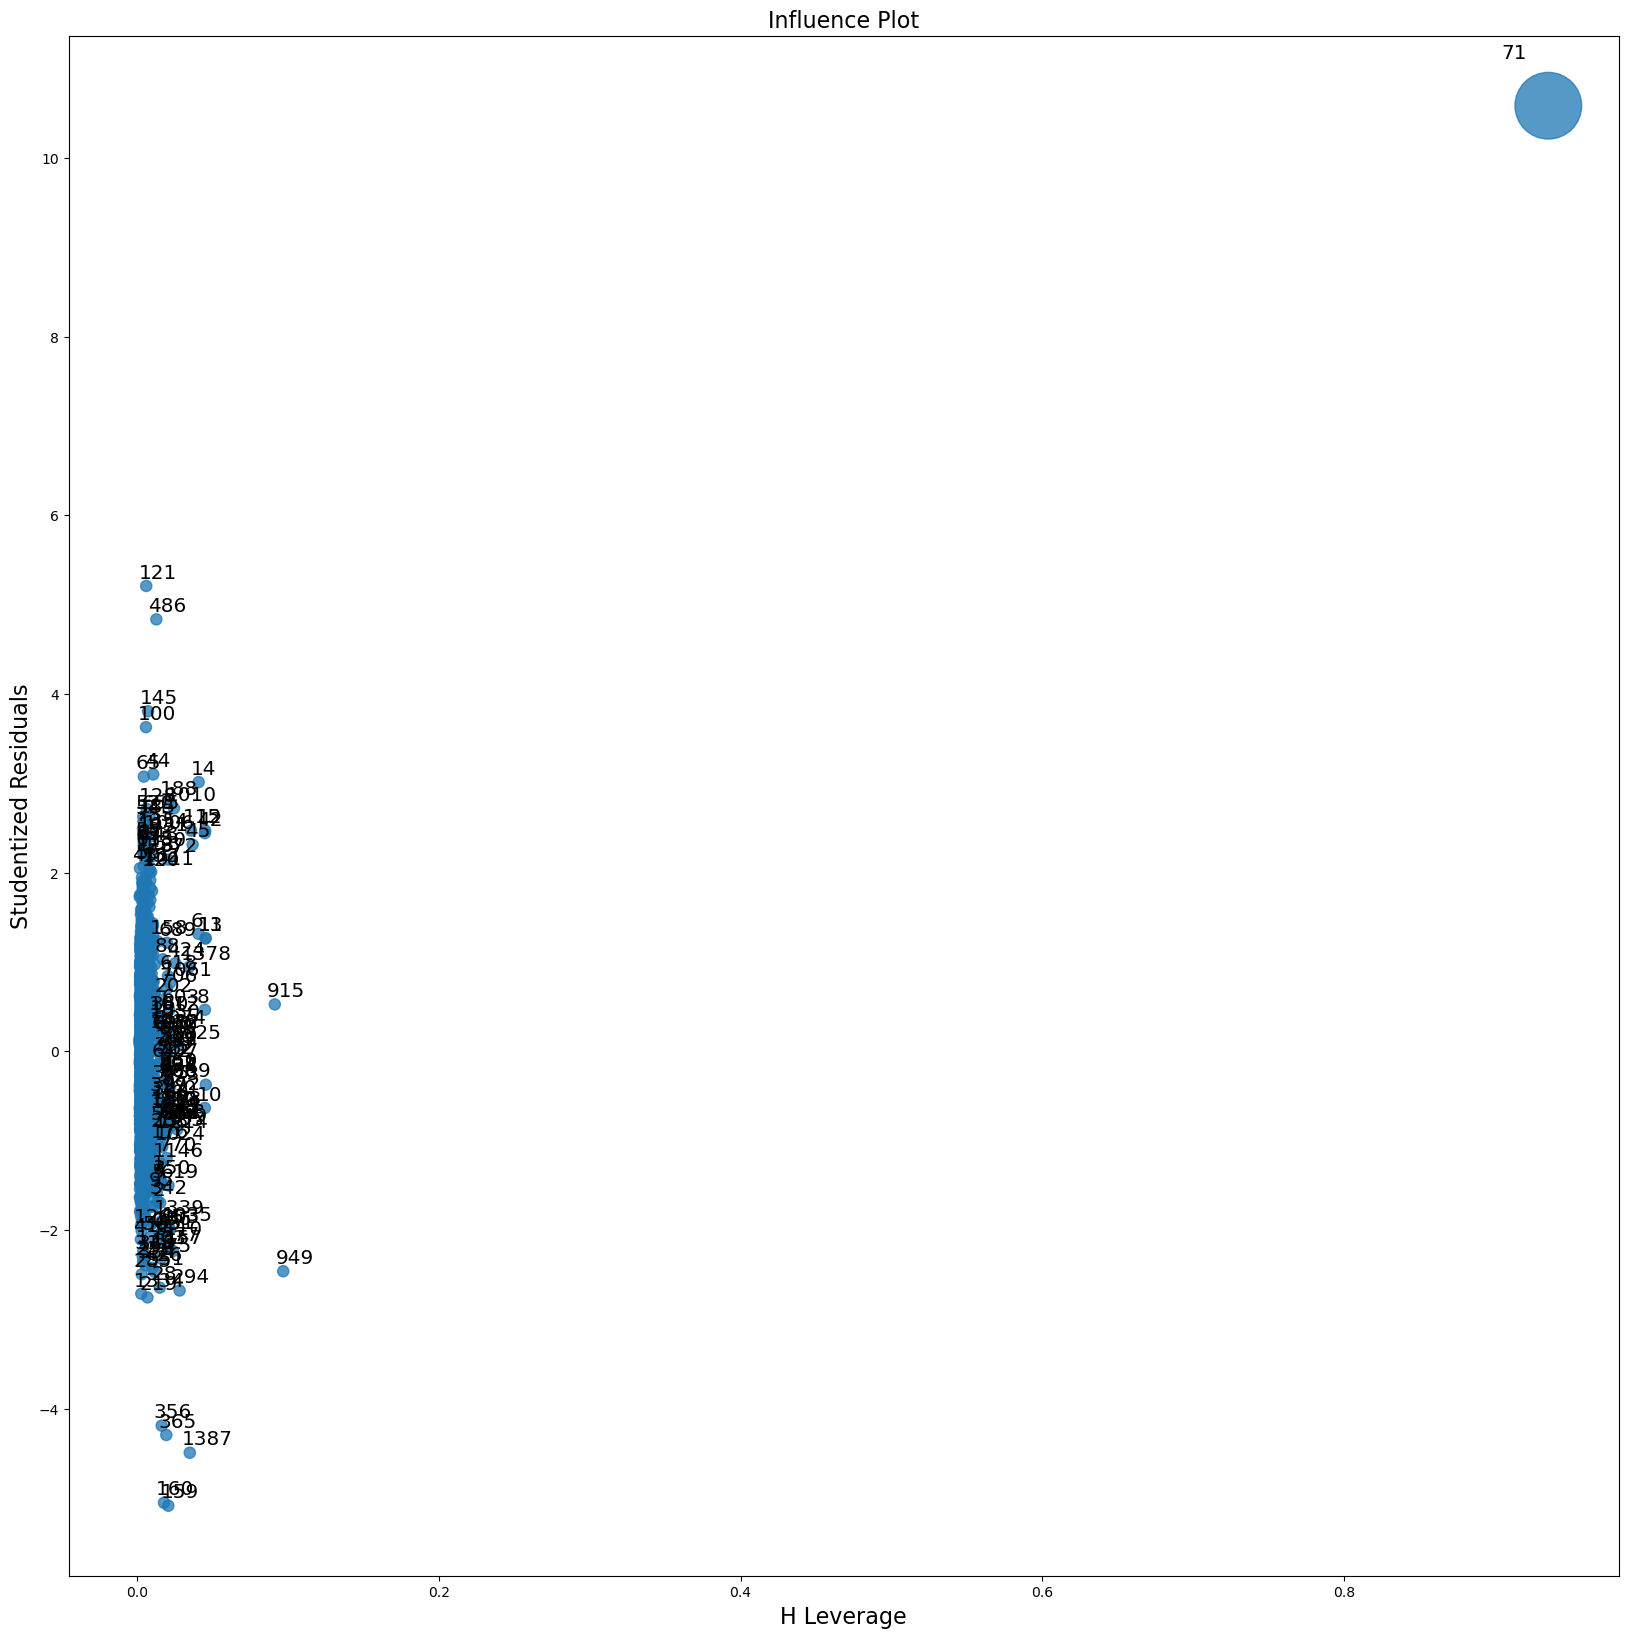

In [1380]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model_final,ax = ax)
plt.show()

In [1381]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data_cleaned_final.shape[1]
n=data_cleaned_final.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.021613832853025938

In [ ]:
# drop influencer value 71

In [1383]:
data_cleaned_final[data_cleaned_final.index.isin([71])] 

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
71,2.600931,-1.791229,-1.584316,0.551221,33.950153,1.026814,-0.142881,0.46913,3.066428


In [1384]:
data_cleaned1=data_cleaned_final

In [1385]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data_cleaned11=data_cleaned1.drop(data_cleaned1.index[[71]],axis=0).reset_index(drop=True)


In [1386]:
data_cleaned11

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0.918359,-1.903891,-0.499514,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
1,0.995541,-1.903891,0.268697,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
2,1.057287,-1.847560,-0.680086,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
3,1.366016,-1.734898,-0.465986,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
4,0.995541,-1.509574,-0.795644,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.796166
...,...,...,...,...,...,...,...,...,...
1382,-0.934015,0.687336,-1.557752,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.122641
1383,0.098683,0.856329,-1.636889,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1384,-0.625286,0.799998,-1.743462,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1385,-1.011197,0.743667,-1.748994,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903


In [1387]:
while np.max(c)>0.5 :
    model_f=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data_cleaned11).fit()
    (c,_)=model_f.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data_cleaned11=data_cleaned11.drop(data_cleaned11.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_cleaned11
else:
    final_model_f=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data_cleaned11).fit()
    final_model_f.rsquared , final_model_f.aic
    print("Thus model accuracy is improved to",final_model_f.rsquared)

Thus model accuracy is improved to 0.8661758732854168


In [1388]:
final_model_f.rsquared

0.8661758732854168

- final accuracy of model is 86.61%

In [1389]:
data_cleaned11

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0.918359,-1.903891,-0.499514,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
1,0.995541,-1.903891,0.268697,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
2,1.057287,-1.847560,-0.680086,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
3,1.366016,-1.734898,-0.465986,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.661034
4,0.995541,-1.509574,-0.795644,-0.790109,1.023329,-1.073728,-0.142881,3.633559,2.796166
...,...,...,...,...,...,...,...,...,...
1381,-0.934015,0.687336,-1.557752,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.122641
1382,0.098683,0.856329,-1.636889,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1383,-0.625286,0.799998,-1.743462,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903
1384,-1.011197,0.743667,-1.748994,-1.058375,-0.623012,-1.073728,-0.142881,-0.422663,-1.392903


In [1390]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [1391]:
# Manual Prediction of Price
final_model_f.predict(new_data)

0   -7879.305784
dtype: float64

In [1392]:
# Automatic Prediction of Price with 86.61% accurcy
pred_y=final_model_f.predict(data_cleaned11)
pred_y

0       1.681943
1       1.534934
2       1.683128
3       1.575415
4       1.552684
          ...   
1381   -0.368726
1382   -0.549029
1383   -0.495263
1384   -0.460834
1385    0.456615
Length: 1386, dtype: float64